In [1]:
import gc
import numpy as np
import pandas as pd
import sklearn
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets, models, transforms
import torch
from matplotlib import pyplot as plt
from tensorflow import keras
from cv2 import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import torchmetrics 
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch import nn
from torch.optim import AdamW,Adam # optmizers
import time
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import os
import glob
import plotly.graph_objects as go
import cv2
from PIL import Image
from PIL import ImageFile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
ImageFile.LOAD_TRUNCATED_IMAGES = True

from tqdm import tqdm

In [2]:
X_valid = np.load('../input/cervical-cancer-screening128/X_valid_128.npy',allow_pickle=True)
y_valid = np.load('../input/cervical-cancer-screening128/y_valid_128.npy',allow_pickle=True)
X_train = np.load('../input/cervical-cancer-screening128/X_train_128.npy',allow_pickle=True)
y_train = np.load('../input/cervical-cancer-screening128/y_train_128.npy',allow_pickle=True)

# 데이터

# 데이터 분리

In [3]:
# Train / Validation

#train_df, valid_df = train_test_split(files_df, test_size = 0.2, stratify = files_df['label'], random_state = 1234)

#print(len(train_df), len(valid_df))

In [4]:
#X_train = train_df[['filepath']]
#y_train = train_df[['label']]
#X_train = X_train.reset_index(drop=True)
#y_train = y_train.reset_index(drop=True)

In [5]:
#X_valid = valid_df[['filepath']].reset_index(drop=True)
#y_valid = valid_df[['label']].reset_index(drop=True)

print(len(X_train), len(y_train), len(X_valid),len(y_valid))

6569 6569 1643 1643


# 데이터 전처리

In [6]:
# save train data as npy files

#np.save('/kaggle/working/X_train_25', X_train)
#np.save('/kaggle/working/y_train_25', y_train)

In [7]:
#features = []
#f_app = features.append
#path = train_df['filepath'].values
#labels = train_df['label'].values
#for p in tqdm(path):
#    image = cv2.imread(p)
#    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#    re_image = cv2.resize(image, (128,128))
#    f_app(np.array(re_image))

#X_train = np.array(features)
#y_train = np.array(labels)

In [8]:
# 소요시간줄이는코드 (추가 수정 필요)
#path = train_df['filepath'].values
#labels = train_df['label'].values
#features = [np.array(cv2.resize(cv2.cvtColor(cv2.imread(p),cv2.COLOR_RGB2BGR),(180,180))) for p in tqdm(path)]

In [9]:
# validation data

#features = []
#f_app = features.append
#path = valid_df['filepath'].values
#labels = valid_df['label'].values
#for p in tqdm(path):
#    image = cv2.imread(p)
#    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#    re_image = cv2.resize(image, (128,128))
#    f_app(np.array(re_image))

#X_valid = np.array(features)
#y_valid = np.array(labels)

In [10]:
# save validation data as npy files

#np.save('/kaggle/working/X_valid', X_valid)
#np.save('/kaggle/working/y_valid', y_valid)

In [11]:
# X train data 확인
X_train[0]

array([[[ 71,  81,  90],
        [ 79,  89,  97],
        [ 88, 101, 106],
        ...,
        [ 87,  57,  81],
        [ 90,  58,  82],
        [ 87,  55,  78]],

       [[ 82,  89,  97],
        [ 88,  95, 101],
        [ 96, 107, 111],
        ...,
        [100,  66,  93],
        [ 99,  65,  92],
        [ 93,  60,  88]],

       [[ 79,  83,  94],
        [ 93,  98, 104],
        [107, 114, 120],
        ...,
        [102,  67, 100],
        [ 99,  64,  96],
        [ 98,  63,  93]],

       ...,

       [[ 94,  62,  86],
        [ 75,  47,  69],
        [ 64,  43,  58],
        ...,
        [ 70,  37,  44],
        [ 69,  37,  48],
        [ 67,  36,  51]],

       [[110,  74, 100],
        [ 89,  57,  81],
        [ 77,  49,  71],
        ...,
        [ 53,  24,  28],
        [ 60,  30,  40],
        [ 65,  36,  54]],

       [[120,  84, 110],
        [108,  75,  99],
        [ 95,  63,  87],
        ...,
        [ 51,  23,  35],
        [ 60,  29,  47],
        [ 78,  46,  72]]

In [12]:
# X validation data 확인
X_valid[0]

array([[[ 59,  51,  72],
        [ 57,  49,  67],
        [ 59,  52,  70],
        ...,
        [ 29,  39,  50],
        [ 22,  31,  39],
        [ 28,  36,  45]],

       [[ 61,  53,  72],
        [ 67,  56,  76],
        [ 68,  54,  77],
        ...,
        [ 22,  40,  48],
        [ 25,  39,  48],
        [ 26,  35,  45]],

       [[ 70,  61,  80],
        [ 67,  59,  73],
        [ 71,  59,  79],
        ...,
        [ 25,  38,  54],
        [ 27,  39,  51],
        [ 28,  37,  47]],

       ...,

       [[ 95,  87, 110],
        [101,  93, 117],
        [115, 103, 127],
        ...,
        [ 63,  49,  74],
        [ 60,  47,  67],
        [ 59,  45,  69]],

       [[ 70,  67,  88],
        [ 85,  78, 101],
        [100,  91, 118],
        ...,
        [ 54,  41,  61],
        [ 54,  41,  58],
        [ 55,  42,  60]],

       [[ 50,  48,  68],
        [ 63,  60,  81],
        [ 76,  67,  93],
        ...,
        [ 53,  40,  63],
        [ 52,  39,  59],
        [ 46,  34,  50]]

In [13]:
# 정규화 (0과1사이의값)
X_train = X_train/255
X_valid = X_valid/255

In [14]:
# 정규화한 X train data 확인
X_train[0]

array([[[0.27843137, 0.31764706, 0.35294118],
        [0.30980392, 0.34901961, 0.38039216],
        [0.34509804, 0.39607843, 0.41568627],
        ...,
        [0.34117647, 0.22352941, 0.31764706],
        [0.35294118, 0.22745098, 0.32156863],
        [0.34117647, 0.21568627, 0.30588235]],

       [[0.32156863, 0.34901961, 0.38039216],
        [0.34509804, 0.37254902, 0.39607843],
        [0.37647059, 0.41960784, 0.43529412],
        ...,
        [0.39215686, 0.25882353, 0.36470588],
        [0.38823529, 0.25490196, 0.36078431],
        [0.36470588, 0.23529412, 0.34509804]],

       [[0.30980392, 0.3254902 , 0.36862745],
        [0.36470588, 0.38431373, 0.40784314],
        [0.41960784, 0.44705882, 0.47058824],
        ...,
        [0.4       , 0.2627451 , 0.39215686],
        [0.38823529, 0.25098039, 0.37647059],
        [0.38431373, 0.24705882, 0.36470588]],

       ...,

       [[0.36862745, 0.24313725, 0.3372549 ],
        [0.29411765, 0.18431373, 0.27058824],
        [0.25098039, 0

In [15]:
# 정규화한 X validation data 확인
X_valid[0]

array([[[0.23137255, 0.2       , 0.28235294],
        [0.22352941, 0.19215686, 0.2627451 ],
        [0.23137255, 0.20392157, 0.2745098 ],
        ...,
        [0.11372549, 0.15294118, 0.19607843],
        [0.08627451, 0.12156863, 0.15294118],
        [0.10980392, 0.14117647, 0.17647059]],

       [[0.23921569, 0.20784314, 0.28235294],
        [0.2627451 , 0.21960784, 0.29803922],
        [0.26666667, 0.21176471, 0.30196078],
        ...,
        [0.08627451, 0.15686275, 0.18823529],
        [0.09803922, 0.15294118, 0.18823529],
        [0.10196078, 0.1372549 , 0.17647059]],

       [[0.2745098 , 0.23921569, 0.31372549],
        [0.2627451 , 0.23137255, 0.28627451],
        [0.27843137, 0.23137255, 0.30980392],
        ...,
        [0.09803922, 0.14901961, 0.21176471],
        [0.10588235, 0.15294118, 0.2       ],
        [0.10980392, 0.14509804, 0.18431373]],

       ...,

       [[0.37254902, 0.34117647, 0.43137255],
        [0.39607843, 0.36470588, 0.45882353],
        [0.45098039, 0

In [16]:
# train 개수, 차원 확인
print(len(X_train), len(y_train))
print(X_train.shape)

6569 6569
(6569, 128, 128, 3)


In [17]:
# validation 개수, 차원 확인
print(len(X_valid), len(y_valid))
print(X_valid.shape)

1643 1643
(1643, 128, 128, 3)


In [18]:
# y 라벨링 (string -> int)
le = LabelEncoder().fit(['Type 1', 'Type 2', 'Type 3'])
y_train = le.transform(y_train)
y_valid = le.transform(y_valid)

y_train_onehot = to_categorical(y_train, num_classes=3)
y_valid_onehot = to_categorical(y_valid, num_classes=3)

In [19]:
y_train_onehot[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [20]:
y_valid_onehot[:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [21]:
class Depthwise_bn_relu(tf.keras.Model):
    def __init__(self, strides, padding):
        super(Depthwise_bn_relu, self).__init__()

        self.strides = strides
        self.padding = padding

        self.dw = tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), 
                                                  strides=self.strides, 
                                                  padding=self.padding,
                                                  use_bias=False)
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()

    def call(self, x, training=False):
        x = self.dw(x)
        x = self.bn(x)
        x = self.relu(x)

        return x



class Pointwise_bn_relu(tf.keras.Model):
    def __init__(self, nb_filters):
        super(Pointwise_bn_relu, self).__init__()

        self.nb_filters = nb_filters

        self.pw = tf.keras.layers.Conv2D(self.nb_filters,
                                         kernel_size=(1, 1), 
                                         strides=(1, 1),  
                                         padding='same', 
                                         use_bias=False)
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()

    def call(self, x, training=False):
        x = self.pw(x)
        x = self.bn(x)
        x = self.relu(x)

        return x


    


class MobilenetV1(tf.keras.Model):
    def __init__(self, nb_class):
        super(MobilenetV1, self).__init__()

        self.nb_class = nb_class
        self.zero_pad = tf.keras.layers.ZeroPadding2D((2, 2))
        self.conv = tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), use_bias=False)
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()

        self.block1 = tf.keras.Sequential()
        self.block1.add(Depthwise_bn_relu(1, 'same'))
        self.block1.add(Pointwise_bn_relu(64))
        self.zero_pad_1 = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)))
        
        
        self.block2 = tf.keras.Sequential()
        self.block2.add(Depthwise_bn_relu(2, 'valid'))
        self.block2.add(Pointwise_bn_relu(128))
        self.block2.add(Depthwise_bn_relu(1, 'same'))
        self.block2.add(Pointwise_bn_relu(128))
        self.zero_pad_2 = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)))


        self.block3 = tf.keras.Sequential()
        self.block3.add(Depthwise_bn_relu(2, 'valid'))
        self.block3.add(Pointwise_bn_relu(256))
        self.block3.add(Depthwise_bn_relu(1, 'same'))
        self.block3.add(Pointwise_bn_relu(256))
        self.zero_pad_3 = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)))


        self.block4 = tf.keras.Sequential()
        self.block4.add(Depthwise_bn_relu(2, 'valid'))
        self.block4.add(Pointwise_bn_relu(512))

        for _ in range(5):
            self.block4.add(Depthwise_bn_relu(1, 'same'))
            self.block4.add(Pointwise_bn_relu(512))

        self.zero_pad_4 = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)))



        self.block5 = tf.keras.Sequential()
        self.block5.add(Depthwise_bn_relu(2, 'valid'))
        self.block5.add(Pointwise_bn_relu(1024))
        self.block5.add(Depthwise_bn_relu(2, 'same'))
        self.block5.add(Pointwise_bn_relu(1024))


        self.gap = tf.keras.layers.GlobalAveragePooling2D()
        self.reshape = tf.keras.layers.Reshape((1, 1, 1024))
        self.drop = tf.keras.layers.Dropout(0.001)
        self.conv_pred = tf.keras.layers.Conv2D(1000, 
                                                kernel_size=(1, 1), 
                                                strides=(1, 1), 
                                                padding='same', 
                                                activation='softmax')
        self.reshape_2 = tf.keras.layers.Reshape((1000,))

        


    def call(self, x, training=False):
        x = self.zero_pad(x)
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
       
        x = self.block1(x)
        x = self.zero_pad_1(x)

        x = self.block2(x)
        x = self.zero_pad_2(x)

        x = self.block3(x)
        x = self.zero_pad_3(x)

        x = self.block4(x)
        x = self.zero_pad_4(x)

        x = self.block5(x)

        x = self.gap(x)
        x = self.reshape(x)
        x = self.drop(x)
        x = self.conv_pred(x)
        x = self.reshape_2(x)
        
        return x

    


model = MobilenetV1(1000)
model.build((1, 128, 128, 3))
model.summary()

2022-11-25 14:46:07.987524: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "mobilenet_v1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 multiple                  0         
_________________________________________________________________
conv2d (Conv2D)              multiple                  864       
_________________________________________________________________
batch_normalization (BatchNo multiple                  128       
_________________________________________________________________
re_lu (ReLU)                 multiple                  0         
_________________________________________________________________
sequential (Sequential)      (1, 65, 65, 64)           2720      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin multiple                  0         
_________________________________________________________________
sequential_1 (Sequential)    (1, 32, 32, 128)         

In [22]:
model.compile(
    loss = 'sparse_categorical_crossentropy'
    ,metrics = ['accuracy']
)

In [23]:
BATCH_SIZE = 16
TRAIN_STEPS = len(X_train)//BATCH_SIZE
VAL_STEPS = len(X_valid)//BATCH_SIZE

In [24]:
reduceLR = ReduceLROnPlateau(monitor='val_accuracy', patience=10, verbose= 1, mode='max', factor=  0.2, min_lr = 1e-5)

early_stopping = EarlyStopping(monitor='val_accuracy', patience = 20, verbose=1, mode='max', restore_best_weights= True)

checkpoint = ModelCheckpoint('movilenet_v1.tf', monitor='val_accuracy', verbose=1,save_best_only=True, mode= 'max')

In [25]:
# Non-augmentation
train_gen = ImageDataGenerator().flow(X_train, y_train, batch_size = BATCH_SIZE)
valid_gen = ImageDataGenerator().flow(X_valid, y_valid, batch_size = BATCH_SIZE)

history_mov1 = model.fit(
    train_gen
    , steps_per_epoch = TRAIN_STEPS
    , validation_data = valid_gen
    , epochs = 100
    , callbacks = [reduceLR, early_stopping, checkpoint]
)

2022-11-25 14:46:09.442546: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
410/410 [==============================] - 118s 275ms/step - loss: 1.1159 - accuracy: 0.4917 - val_loss: 1.0072 - val_accuracy: 0.5295

Epoch 00001: val_accuracy improved from -inf to 0.52952, saving model to movilenet_v1.tf


2022-11-25 14:48:15.935805: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
410/410 [==============================] - 109s 267ms/step - loss: 1.0002 - accuracy: 0.5156 - val_loss: 1.9318 - val_accuracy: 0.4212

Epoch 00002: val_accuracy did not improve from 0.52952
Epoch 3/100
410/410 [==============================] - 114s 277ms/step - loss: 0.9677 - accuracy: 0.5233 - val_loss: 1.0323 - val_accuracy: 0.5222

Epoch 00003: val_accuracy did not improve from 0.52952
Epoch 4/100
410/410 [==============================] - 113s 276ms/step - loss: 0.9463 - accuracy: 0.5271 - val_loss: 1.5533 - val_accuracy: 0.3968

Epoch 00004: val_accuracy did not improve from 0.52952
Epoch 5/100
410/410 [==============================] - 113s 276ms/step - loss: 0.9313 - accuracy: 0.5269 - val_loss: 1.0244 - val_accuracy: 0.4814

Epoch 00005: val_accuracy did not improve from 0.52952
Epoch 6/100
410/410 [==============================] - 117s 286ms/step - loss: 0.9070 - accuracy: 0.5514 - val_loss: 1.0237 - val_accuracy: 0.4948

Epoch 00006: val_accuracy did not improv

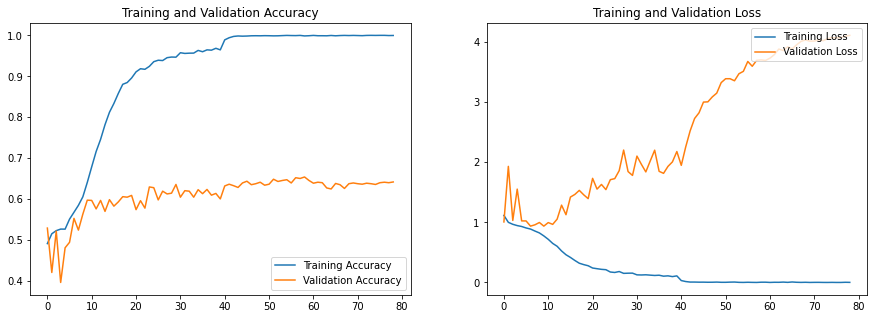

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_mov1.history['accuracy'], label='Training Accuracy')
plt.plot(history_mov1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_mov1.history['loss'], label='Training Loss')
plt.plot(history_mov1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [27]:
class Depthwise_bn_relu(tf.keras.Model):
    def __init__(self, strides, padding):
        super(Depthwise_bn_relu, self).__init__()

        self.strides = strides
        self.padding = padding

        self.dw = tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 3), 
                                                  strides=self.strides, 
                                                  padding=self.padding,
                                                  use_bias=False)
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()

    def call(self, x, training=False):
        x = self.dw(x)
        x = self.bn(x)
        x = self.relu(x)

        return x



class Pointwise_bn_relu(tf.keras.Model):
    def __init__(self, nb_filters):
        super(Pointwise_bn_relu, self).__init__()

        self.nb_filters = nb_filters

        self.pw = tf.keras.layers.Conv2D(self.nb_filters,
                                         kernel_size=(1, 1), 
                                         strides=(1, 1),  
                                         padding='same', 
                                         use_bias=False)
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()

    def call(self, x, training=False):
        x = self.pw(x)
        x = self.bn(x)
        x = self.relu(x)

        return x


    


class MobilenetV1(tf.keras.Model):
    def __init__(self, nb_class):
        super(MobilenetV1, self).__init__()

        self.nb_class = nb_class
        self.zero_pad = tf.keras.layers.ZeroPadding2D((2, 2))
        self.conv = tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), use_bias=False)
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()

        self.block1 = tf.keras.Sequential()
        self.block1.add(Depthwise_bn_relu(1, 'same'))
        self.block1.add(Pointwise_bn_relu(64))
        self.zero_pad_1 = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)))
        
        
        self.block2 = tf.keras.Sequential()
        self.block2.add(Depthwise_bn_relu(2, 'valid'))
        self.block2.add(Pointwise_bn_relu(128))
        self.block2.add(Depthwise_bn_relu(1, 'same'))
        self.block2.add(Pointwise_bn_relu(128))
        self.zero_pad_2 = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)))


        self.block3 = tf.keras.Sequential()
        self.block3.add(Depthwise_bn_relu(2, 'valid'))
        self.block3.add(Pointwise_bn_relu(256))
        self.block3.add(Depthwise_bn_relu(1, 'same'))
        self.block3.add(Pointwise_bn_relu(256))
        self.zero_pad_3 = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)))


        self.block4 = tf.keras.Sequential()
        self.block4.add(Depthwise_bn_relu(2, 'valid'))
        self.block4.add(Pointwise_bn_relu(512))

        for _ in range(5):
            self.block4.add(Depthwise_bn_relu(1, 'same'))
            self.block4.add(Pointwise_bn_relu(512))

        self.zero_pad_4 = tf.keras.layers.ZeroPadding2D(padding=((0, 1), (0, 1)))



        self.block5 = tf.keras.Sequential()
        self.block5.add(Depthwise_bn_relu(2, 'valid'))
        self.block5.add(Pointwise_bn_relu(1024))
        self.block5.add(Depthwise_bn_relu(2, 'same'))
        self.block5.add(Pointwise_bn_relu(1024))


        self.gap = tf.keras.layers.GlobalAveragePooling2D()
        self.reshape = tf.keras.layers.Reshape((1, 1, 1024))
        self.drop = tf.keras.layers.Dropout(0.001)
        self.conv_pred = tf.keras.layers.Conv2D(1000, 
                                                kernel_size=(1, 1), 
                                                strides=(1, 1), 
                                                padding='same', 
                                                activation='softmax')
        self.reshape_2 = tf.keras.layers.Reshape((1000,))

        


    def call(self, x, training=False):
        x = self.zero_pad(x)
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
       
        x = self.block1(x)
        x = self.zero_pad_1(x)

        x = self.block2(x)
        x = self.zero_pad_2(x)

        x = self.block3(x)
        x = self.zero_pad_3(x)

        x = self.block4(x)
        x = self.zero_pad_4(x)

        x = self.block5(x)

        x = self.gap(x)
        x = self.reshape(x)
        x = self.drop(x)
        x = self.conv_pred(x)
        x = self.reshape_2(x)
        
        return x

    


model_ag = MobilenetV1(1000)
model_ag.build((1, 128, 128, 3))
model_ag.summary()

Model: "mobilenet_v1_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_5 (ZeroPaddin multiple                  0         
_________________________________________________________________
conv2d_15 (Conv2D)           multiple                  864       
_________________________________________________________________
batch_normalization_27 (Batc multiple                  128       
_________________________________________________________________
re_lu_27 (ReLU)              multiple                  0         
_________________________________________________________________
sequential_5 (Sequential)    (1, 65, 65, 64)           2720      
_________________________________________________________________
zero_padding2d_6 (ZeroPaddin multiple                  0         
_________________________________________________________________
sequential_6 (Sequential)    (1, 32, 32, 128)       

In [28]:
model_ag.compile(
    loss = 'sparse_categorical_crossentropy'
    ,metrics = ['accuracy']
)

In [29]:
train_datagen = ImageDataGenerator(rescale=1/255,
                     rotation_range=20,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.1,
                     vertical_flip=True,
                     horizontal_flip=True,
                     fill_mode='nearest')


train_gen_ag = train_datagen.flow(X_train, y_train, batch_size = BATCH_SIZE)

In [30]:
reduceLR = ReduceLROnPlateau(monitor='val_accuracy', patience=10, verbose= 1, mode='max', factor=  0.2, min_lr = 1e-5)

early_stopping = EarlyStopping(monitor='val_accuracy', patience = 20, verbose=1, mode='max', restore_best_weights= True)

checkpoint_ag = ModelCheckpoint('movilenet_v1_ag.tf', monitor='val_accuracy', verbose=1,save_best_only=True, mode= 'max')

In [31]:
history_mov1_ag = model_ag.fit(
    train_gen_ag
    , steps_per_epoch= TRAIN_STEPS
    , validation_data=valid_gen
    , validation_steps=VAL_STEPS
    , epochs= 100
    , callbacks= [reduceLR, early_stopping, checkpoint_ag]
)

Epoch 1/100
410/410 [==============================] - 136s 318ms/step - loss: 1.1255 - accuracy: 0.4839 - val_loss: 1.0136 - val_accuracy: 0.5312

Epoch 00001: val_accuracy improved from -inf to 0.53125, saving model to movilenet_v1_ag.tf
Epoch 2/100
410/410 [==============================] - 128s 312ms/step - loss: 1.0205 - accuracy: 0.5159 - val_loss: 11.3668 - val_accuracy: 0.2947

Epoch 00002: val_accuracy did not improve from 0.53125
Epoch 3/100
410/410 [==============================] - 129s 315ms/step - loss: 0.9972 - accuracy: 0.5144 - val_loss: 11.3380 - val_accuracy: 0.2947

Epoch 00003: val_accuracy did not improve from 0.53125
Epoch 4/100
410/410 [==============================] - 126s 308ms/step - loss: 0.9783 - accuracy: 0.5199 - val_loss: 13.2936 - val_accuracy: 0.1752

Epoch 00004: val_accuracy did not improve from 0.53125
Epoch 5/100
410/410 [==============================] - 128s 312ms/step - loss: 0.9603 - accuracy: 0.5207 - val_loss: 13.2837 - val_accuracy: 0.1759


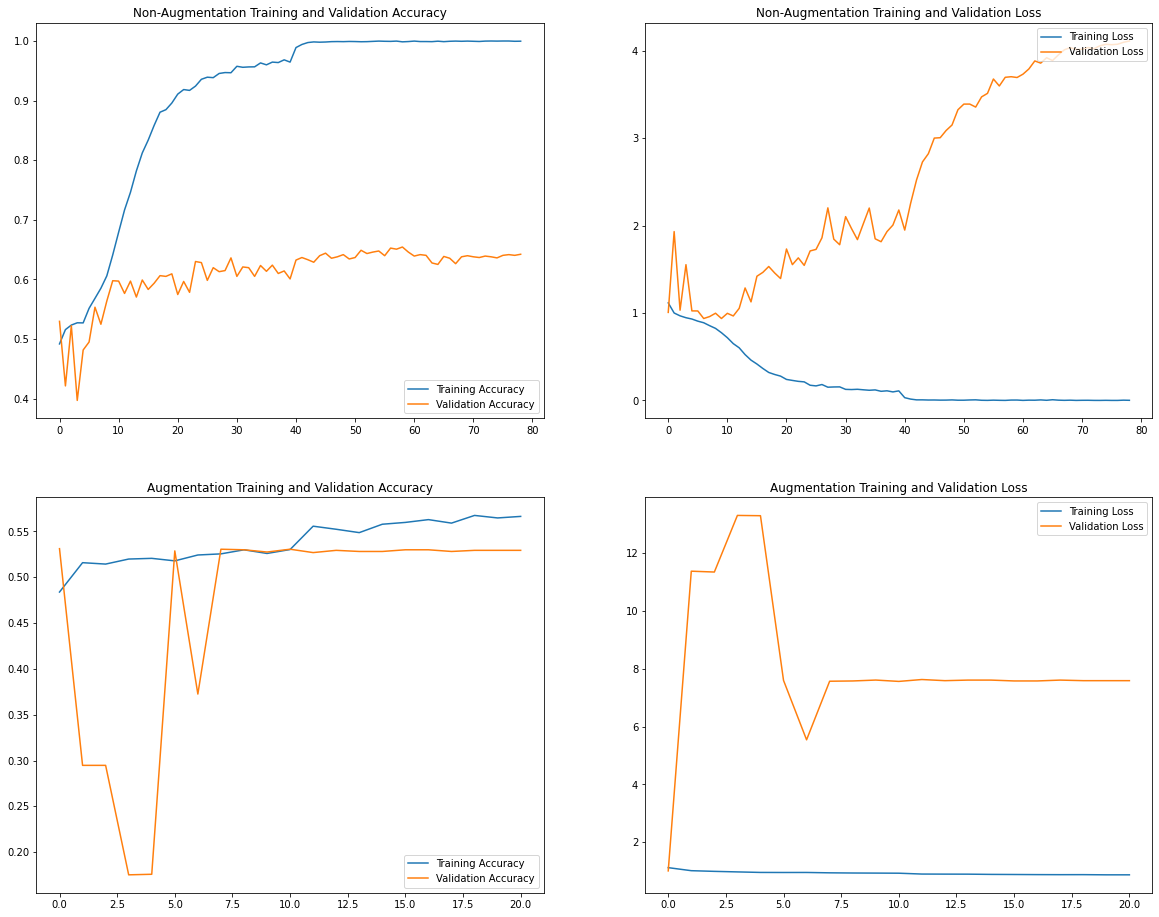

In [32]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
plt.plot(history_mov1.history['accuracy'], label='Training Accuracy')
plt.plot(history_mov1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Non-Augmentation Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(history_mov1.history['loss'], label='Training Loss')
plt.plot(history_mov1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Non-Augmentation Training and Validation Loss')

plt.subplot(2, 2, 3)
plt.plot(history_mov1_ag.history['accuracy'], label='Training Accuracy')
plt.plot(history_mov1_ag.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Augmentation Training and Validation Accuracy')

plt.subplot(2, 2, 4)
plt.plot(history_mov1_ag.history['loss'], label='Training Loss')
plt.plot(history_mov1_ag.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Augmentation Training and Validation Loss')

plt.show()

In [33]:
y_pred_enc = model.predict(X_valid)          # one-hot encoding된 label 예측값
y_pred = [np.argmax(i) for i in y_pred_enc] # label 예측값

item = {
      0: 'Type 1'
    , 1: 'Type 2'
    , 2: 'Type 3'
}

matrix = confusion_matrix(y_valid, y_pred)
df = pd.DataFrame(matrix)
df.columns = item.values()
df.index = item.values()
        
df

,Type 1,Type 2,Type 3
Type 1,150,94,44
Type 2,58,667,145
Type 3,35,192,258


In [34]:
y_pred_enc = model_ag.predict(X_valid)          # one-hot encoding된 label 예측값
y_pred = [np.argmax(i) for i in y_pred_enc] # label 예측값

item = {
      0: 'Type 1'
    , 1: 'Type 2'
    , 2: 'Type 3'
}

matrix = confusion_matrix(y_valid, y_pred)
df = pd.DataFrame(matrix)
df.columns = item.values()
df.index = item.values()
        
df

,Type 1,Type 2,Type 3
Type 1,0,288,0
Type 2,0,870,0
Type 3,0,485,0


In [35]:
model.save_weights('mobilenet_v1.h5')
model_ag.save_weights('mobilenet_v1_ag.h5')

# test data (2차에 활용)

In [36]:
# load data

X_test = np.load('../input/cervicalcancerscreening128-test/X_test_128.npy')
y_test = np.load('../input/cervicalcancerscreening128-test/y_test_128.npy', allow_pickle=True)

In [37]:
# normalize test features

X_test = X_test/255

In [38]:
ydf = pd.DataFrame(y_test)

In [39]:
ydf[0] = ydf[0].replace(1, 't1')
ydf[1] = ydf[1].replace(1, 't2')
ydf[2] = ydf[2].replace(1, 't3')

In [40]:
type1 = ydf[ydf[0].isin(['t1'])][0]
type2 = ydf[ydf[1].isin(['t2'])][1]
type3 = ydf[ydf[2].isin(['t3'])][2]

In [41]:
type = pd.concat([type1, type2, type3])
type

2      t1
16     t1
20     t1
23     t1
25     t1
       ..
496    t3
499    t3
502    t3
504    t3
511    t3
Length: 512, dtype: object

In [42]:
type = type.replace('t1',0)
type = type.replace('t2',1)
type = type.replace('t3',2)

In [43]:
type = type.sort_index()
y_test = np.array(type)

In [44]:
#load best weights
model.load_weights('mobilenet_v1.h5')
model_ag.load_weights('mobilenet_v1_ag.h5')

In [45]:
test_gen = ImageDataGenerator().flow(X_test, y_test, batch_size = BATCH_SIZE)

In [46]:
model.evaluate(test_gen)

32/32 [==============================] - 2s 63ms/step - loss: 4.7288 - accuracy: 0.5664


[4.728822231292725, 0.56640625]

In [47]:
model_ag.evaluate(test_gen)

32/32 [==============================] - 2s 62ms/step - loss: 1.0221 - accuracy: 0.5176


[1.022114634513855, 0.517578125]

In [48]:
y_pred_enc = model.predict(X_test)        
y_pred = [np.argmax(i) for i in y_pred_enc] 
item = {
      0: 'Type 1'
    , 1: 'Type 2'
    , 2: 'Type 3'
}

matrix = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(matrix)
df.columns = item.values()
df.index = item.values()
        
df

,Type 1,Type 2,Type 3
Type 1,33,46,8
Type 2,30,181,54
Type 3,5,79,76


In [49]:
y_pred_enc = model_ag.predict(X_test)        
y_pred = [np.argmax(i) for i in y_pred_enc] 
item = {
      0: 'Type 1'
    , 1: 'Type 2'
    , 2: 'Type 3'
}

matrix = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(matrix)
df.columns = item.values()
df.index = item.values()
        
df

,Type 1,Type 2,Type 3
Type 1,0,87,0
Type 2,0,265,0
Type 3,0,160,0


In [50]:
report = sklearn.metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.52      1.00      0.68       265
           2       0.00      0.00      0.00       160

    accuracy                           0.52       512
   macro avg       0.17      0.33      0.23       512
weighted avg       0.27      0.52      0.35       512



In [51]:
## 정밀도
print(sklearn.metrics.precision_score(y_test, y_pred, average = 'micro'))
## 특이도
print(sklearn.metrics.recall_score(y_test, y_pred, pos_label=0, average = 'micro'))
## 정밀도
print(sklearn.metrics.recall_score(y_test, y_pred, average = 'micro'))

0.517578125
0.517578125
0.517578125
